## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [2]:
#!pip install pandas_datareader

                                              0.0/109.5 kB ? eta -:--:--
                                              0.0/109.5 kB ? eta -:--:--
     ----------                              30.7/109.5 kB 1.3 MB/s eta 0:00:01
     -------------                         41.0/109.5 kB 653.6 kB/s eta 0:00:01
     --------------------                  61.4/109.5 kB 656.4 kB/s eta 0:00:01
     ---------------------------           81.9/109.5 kB 651.6 kB/s eta 0:00:01
     ------------------------------------ 109.5/109.5 kB 527.8 kB/s eta 0:00:00


In [16]:
from pandas_datareader import DataReader
from datetime import datetime


#Yahoo shut down their API last year, therefore pandas_datareader depreciated (took out of use) the function. 

"""
df = DataReader(
    "AAPL", 
    'yahoo',
    start=datetime(2017, 1, 1),
    end=datetime(2018, 12, 31)
)

df.head()
"""

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [17]:
df = np.load('../data sources/average_ratings.npy')
df

array([[ 5.        ,  5.01310274,  5.02623981, ...,  5.52281922,
         5.53729203,  5.52281922],
       [ 7.        ,  6.97074954,  7.        , ..., 10.        ,
        10.        , 10.        ],
       [ 3.        ,  2.9968611 ,  2.99372548, ...,  2.99372548,
         2.99059315,  2.98746409]])

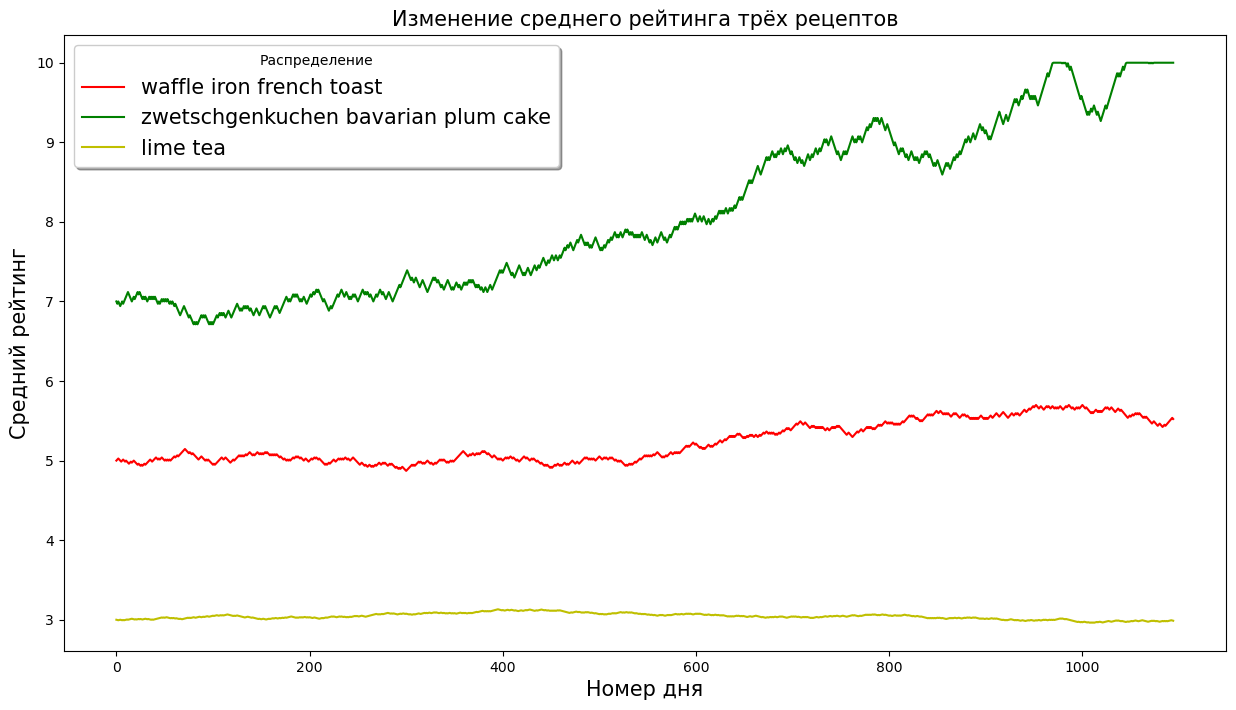

In [18]:
plt.figure(figsize=(15, 8))
plt.title("Изменение среднего рейтинга трёх рецептов", fontsize=15)
plt.plot(range(len(df[0])), df[0], 'r')
plt.plot(range(len(df[1])), df[1], 'g')
plt.plot(range(len(df[2])), df[2], 'y')
plt.xlabel("Номер дня", fontsize=15)
plt.ylabel("Средний рейтинг", fontsize=15)
plt.legend(labels=['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea'], title='Распределение',
           loc='best', shadow=True, fontsize=15)

plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


C:\Users\cvrsd\AppData\Local\Temp\ipykernel_11116\4070123392.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  date = pd.date_range(start='1/1/2019', end='30/12/2021')


<Figure size 640x480 with 0 Axes>

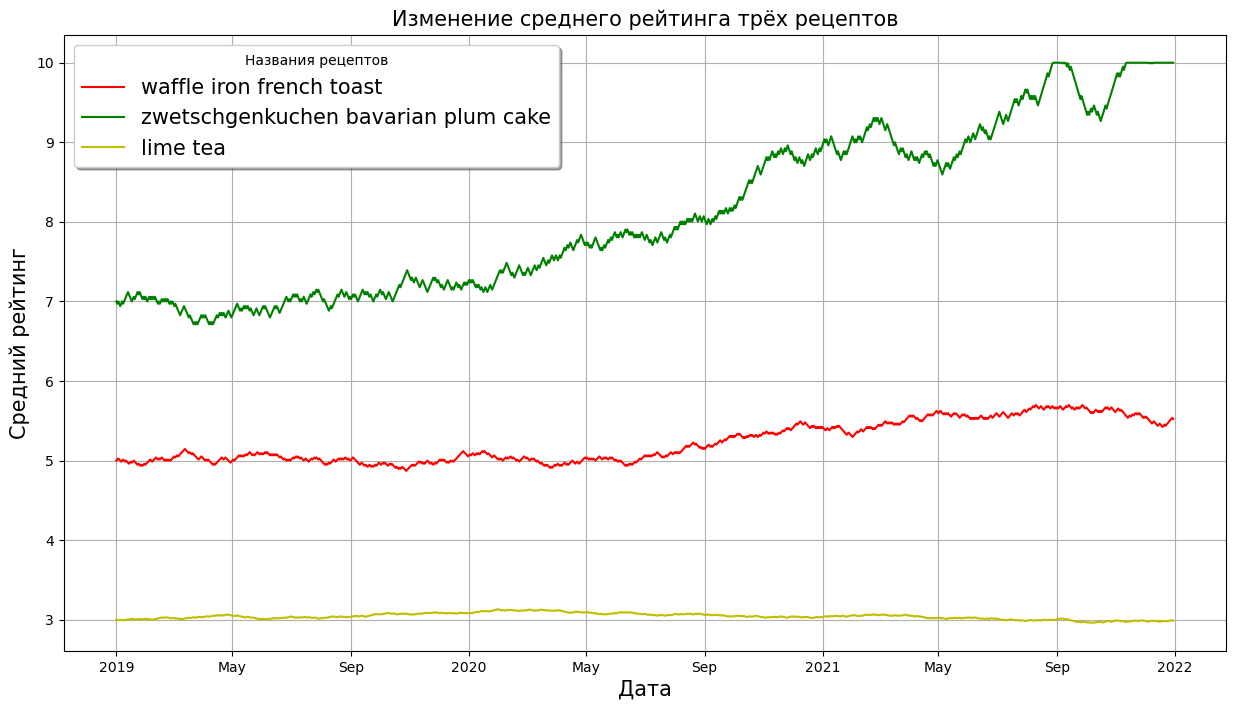

In [31]:
plt.figure()
fig, ax = plt.subplots(figsize=(15, 8))

colors = ['r', 'g', 'y']
date = pd.date_range(start='1/1/2019', end='30/12/2021')

for x in range(len(colors)):
    ax.plot(date, df[x], colors[x])
    
ax.grid(True)
ax.set_xlabel('Дата', fontsize=15)
ax.set_ylabel('Средний рейтинг', fontsize=15)
ax.set_title("Изменение среднего рейтинга трёх рецептов", fontsize=15)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

plt.legend(labels=['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea'], title='Названия рецептов',
           loc='best', shadow=True, fontsize=15)
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

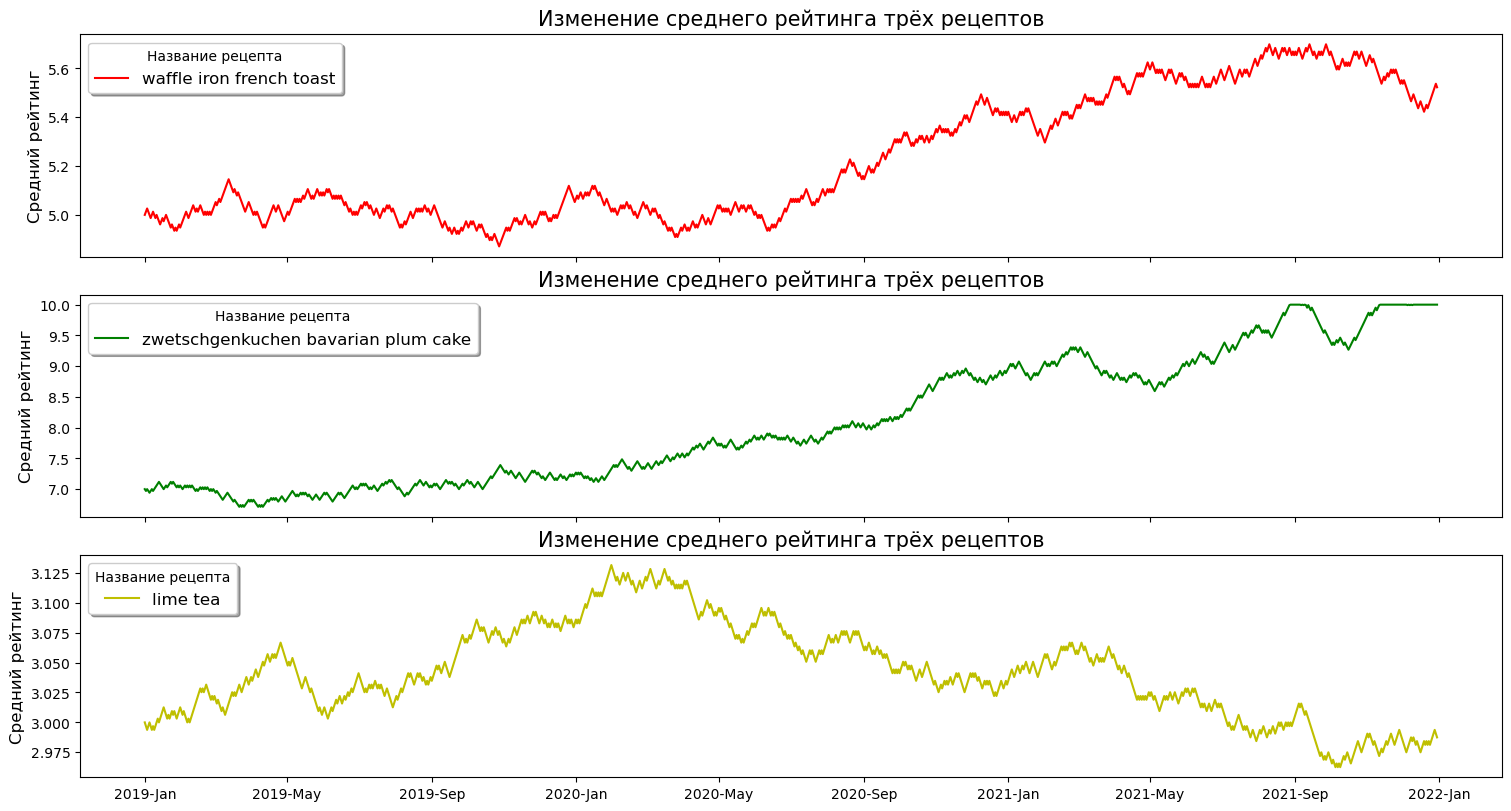

In [40]:
fig, axs = plt.subplots(3, 1, figsize=(15, 8), constrained_layout=True, sharex=True)

recipes = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']


for i, ax in enumerate(axs):
    ax.plot(date, df[i], colors[i])
    ax.set_ylabel('Средний рейтинг', fontsize=12)
    ax.set_title('Изменение среднего рейтинга трёх рецептов', fontsize=15)
    ax.legend([recipes[i]], loc='upper left', shadow=True, fontsize=12, title="Название рецепта")


ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [43]:
visitors = np.load('../data sources/visitors.npy')
visitors

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724,  654,
        558,  526,  454,  383,  372,  356,  274,  239,  236,  214,  179,
        180,  140,  138,  112,  102,  101,   74,   81,   70,   74,   53,
         57,   52,   44,   38,   30,   37,   27,   20,   21,   16,   16,
         12,    9,   13,   10,   13,    7,    5,    8,    6,    8,    9,
          4,    3,    4,    4,    2,    2,    3,    2,    2,    2,    2,
          2,    3,    2,    2,    3,    2,    2,    2,    2,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2])

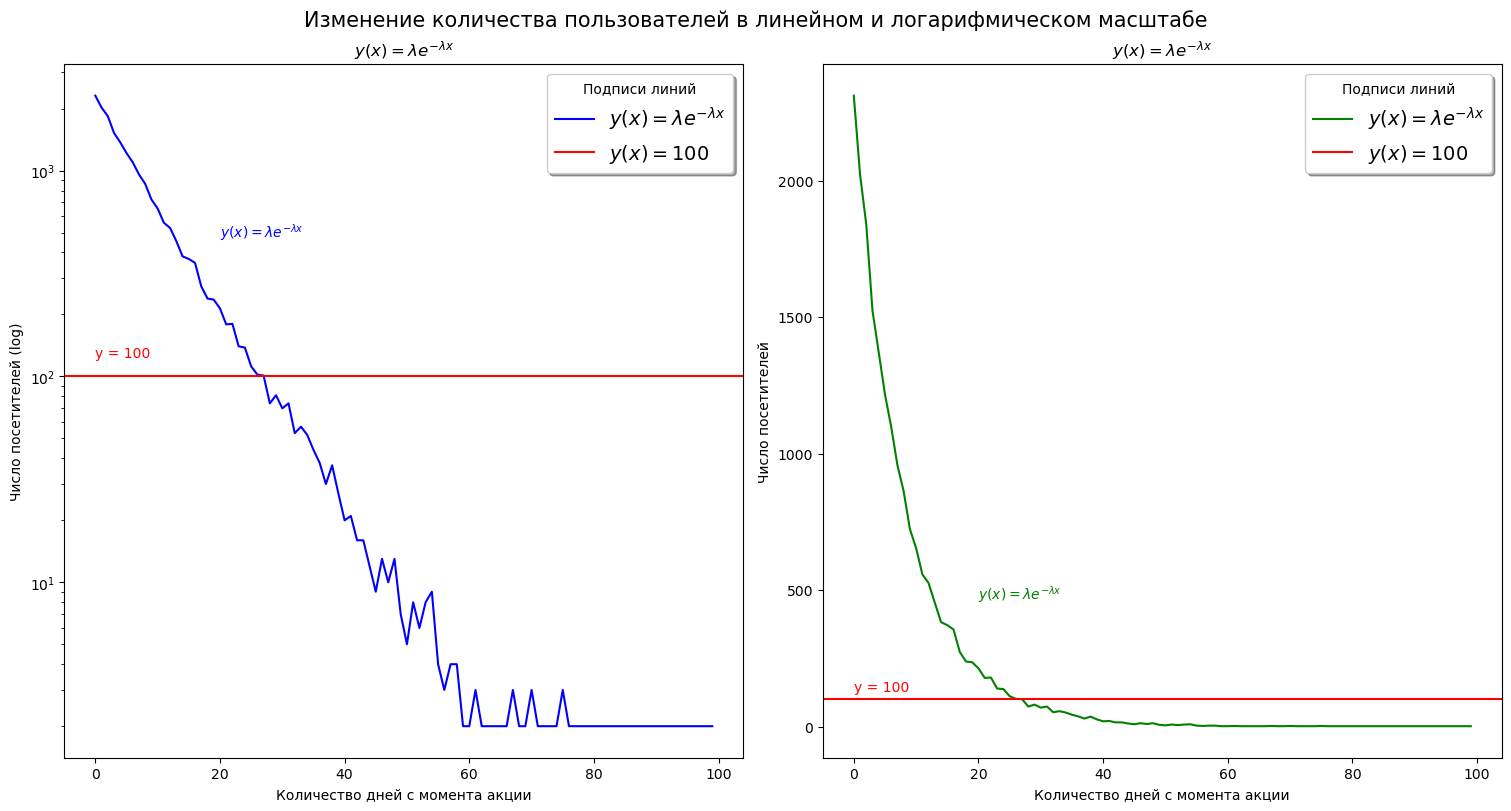

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8), constrained_layout=True)

colors = ['b', 'g']

oY = ["Число посетителей (log)", "Число посетителей"]

for i, ax in enumerate(axs):
    ax.plot(visitors, colors[i])
    ax.axhline(y = 100, color = 'r', linestyle = '-')
    ax.text(0, 120, "y = 100", color = 'red', ha = 'left', va = 'bottom')
    ax.text(20, 450, "$y(x)=\lambda e^{-\lambda x}$", color = colors[i], ha = 'left', va = 'bottom')
    ax.title.set_text('$y(x)=\lambda e^{-\lambda x}$')
    ax.legend(labels=['$y(x)=\lambda e^{-\lambda x}$', '$y(x)=100$'], loc='best', shadow=True, fontsize=14, title="Подписи линий")
    ax.set_yscale(['log', 'linear'][i])
    ax.set_xlabel("Количество дней с момента акции")
    ax.set_ylabel(oY[i])


fig.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе", fontsize=15)
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [92]:
reviews = pd.DataFrame(pd.read_csv('../data sources/reviews_sample.csv'))
recipes = pd.DataFrame(pd.read_csv('../data sources/recipes_sample.csv'))

recipes.head()

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN


In [93]:
reviews.head()

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [109]:
recipes['type'] = False
recipes.loc[recipes['minutes'] < 5, 'type'] = 'short'
recipes.loc[(recipes['minutes'] >= 5) & (recipes['minutes'] < 50), 'type'] = 'average'
recipes.loc[recipes['minutes'] >= 50, 'type'] = 'long'

recipes.groupby("type").count()["id"]

type
average    17607
long       11718
short        675
Name: id, dtype: int64

In [100]:
recipes["type"].value_counts()

average    17607
long       11718
short        675
Name: type, dtype: int64

In [110]:
recipes.groupby("type")["n_steps"].mean()

type
average     8.581922
long       11.917290
short       4.990431
Name: n_steps, dtype: float64

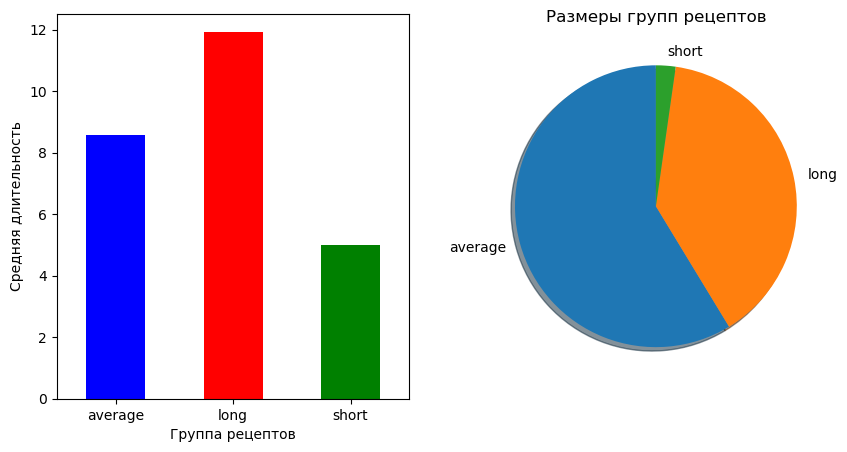

In [143]:
recipe_type = recipes.groupby("type")["n_steps"].mean()
recipe_count = recipes["type"].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


recipe_type.plot.bar(ax=ax1, x='Категория', y='Значение', rot=0, xlabel="Группа рецептов", ylabel="Средняя длительность", color=['b', 'r', 'g'])

recipe_count.plot.pie(ax=ax2, startangle=90, ylabel="", shadow=True)
ax2.set_title("Размеры групп рецептов")



plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [145]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126696 entries, 0 to 126695
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  126696 non-null  int64 
 1   user_id     126696 non-null  int64 
 2   recipe_id   126696 non-null  int64 
 3   date        126696 non-null  object
 4   rating      126696 non-null  int64 
 5   review      126679 non-null  object
dtypes: int64(4), object(2)
memory usage: 5.8+ MB


In [153]:
reviews["date"] = pd.to_datetime(reviews["date"])
fltr = reviews.loc[reviews["date"].dt.year.isin([2008, 2009])]

fltr.head()

,Unnamed: 0,user_id,recipe_id,date,rating,review
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
9,1023302,308434,11252,2008-12-14,5,Oh Bergy! These wonderful little cakes are aw...
10,264646,151754,285773,2008-09-04,0,"This was a very moist cornbread, even two days..."
13,126930,379985,150499,2008-08-21,5,I really liked this recipe. It's perfect to ma...


In [205]:
year2008 = fltr.loc[fltr["date"].dt.year == 2008]["rating"].value_counts().sort_index()
year2009 = fltr.loc[fltr["date"].dt.year == 2009]["rating"].value_counts().sort_index()

print(year2008, year2009, sep='\n\n')

0      693
1      136
2      236
3      718
4     3440
5    13391
Name: rating, dtype: int64

0      656
1      148
2      199
3      594
4     2742
5    13333
Name: rating, dtype: int64


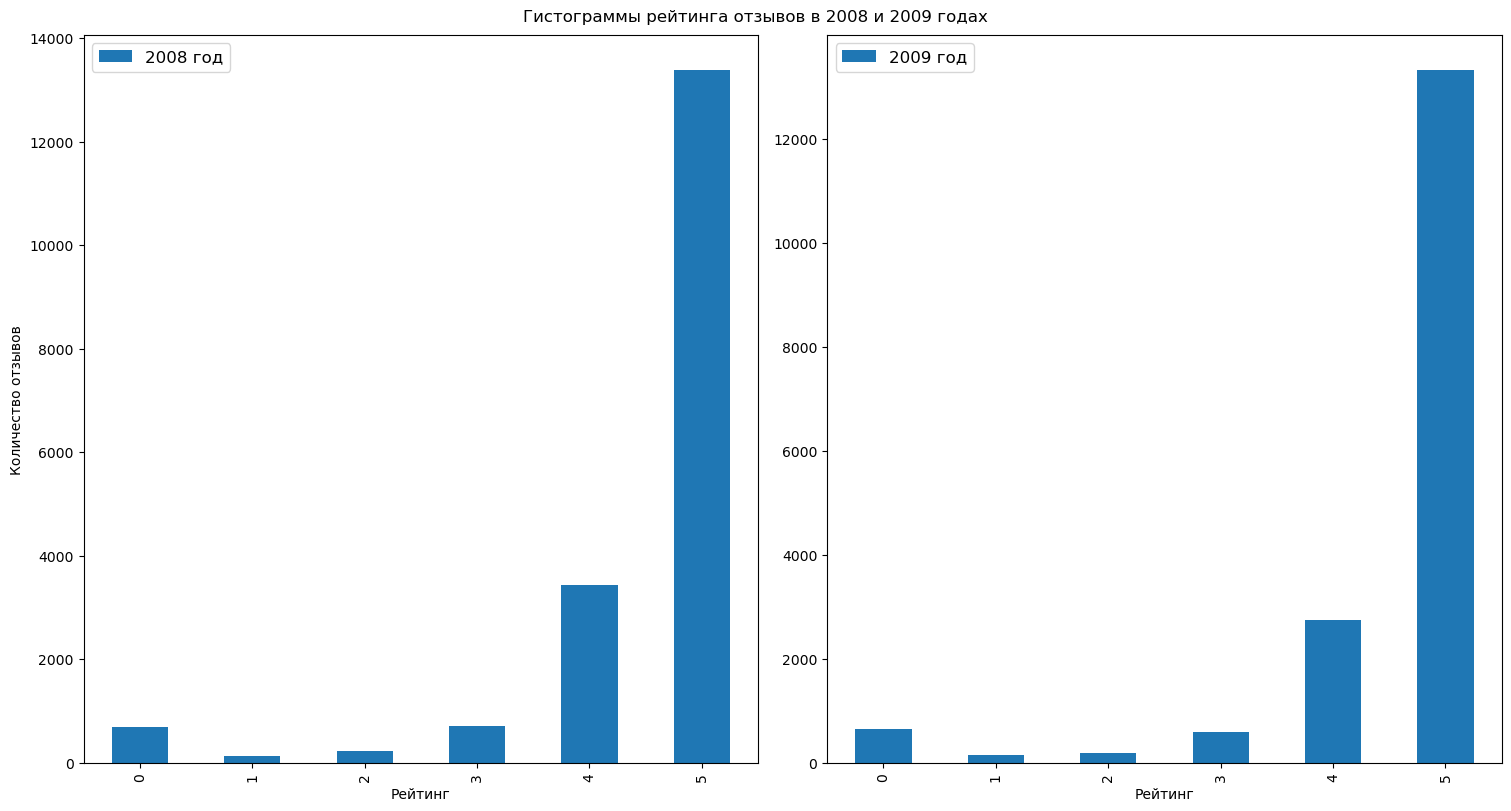

In [207]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), constrained_layout=True)

year2008.plot(kind="bar", ax=ax1, xlabel="Рейтинг", ylabel="Количество отзывов")
year2009.plot(kind="bar", ax=ax2, xlabel="Рейтинг")

ax1.legend(['2008 год'], loc='upper left', fontsize=12)
ax2.legend(['2009 год'], loc='upper left', fontsize=12)


fig.suptitle("Гистограммы рейтинга отзывов в 2008 и 2009 годах")
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [208]:
recipes.head()

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,type
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,long
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,average
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,average
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,average
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,average


<Axes: xlabel='n_steps', ylabel='n_ingredients'>

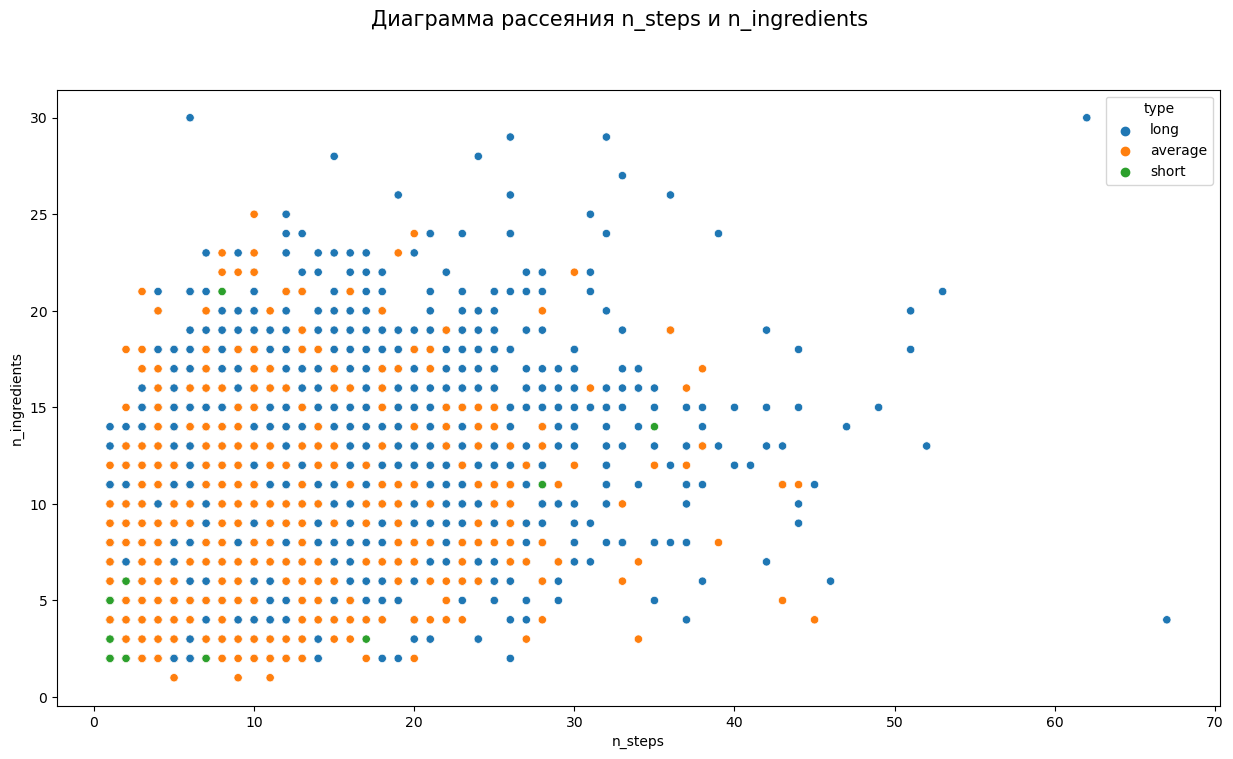

In [242]:
plt.figure(figsize=(15, 8))

plt.suptitle('Диаграмма рассеяния n_steps и n_ingredients', fontsize=15)


sns.scatterplot(data=recipes, x="n_steps", y="n_ingredients", hue="type")

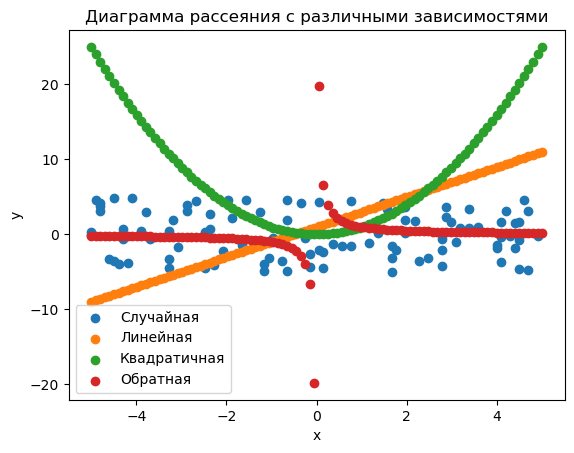

In [219]:
# Создание набора данных
x = np.linspace(-5, 5, 100)

# Линейная зависимость
y_linear = 2 * x + 1

# Квадратичная зависимость
y_quadratic = x**2

# Обратная зависимость
y_inverse = 1 / x

# Генерация случайных данных
random_x = np.random.choice(x, size=100)
random_y = np.random.choice(x, size=100)

# Построение диаграммы рассеяния
plt.scatter(random_x, random_y, label="Случайная")
plt.scatter(x, y_linear, label='Линейная')
plt.scatter(x, y_quadratic, label='Квадратичная')
plt.scatter(x, y_inverse, label='Обратная')




# Настройка осей и заголовка
plt.xlabel('x')
plt.ylabel('y')
plt.title('Диаграмма рассеяния с различными зависимостями')

# Легенда
plt.legend()

# Отображение диаграммы рассеяния
plt.show()

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [239]:
bank = recipes.join(reviews)
bank.head(2)

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,type,Unnamed: 0,user_id,recipe_id,date,rating,review
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,long,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,average,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...


Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

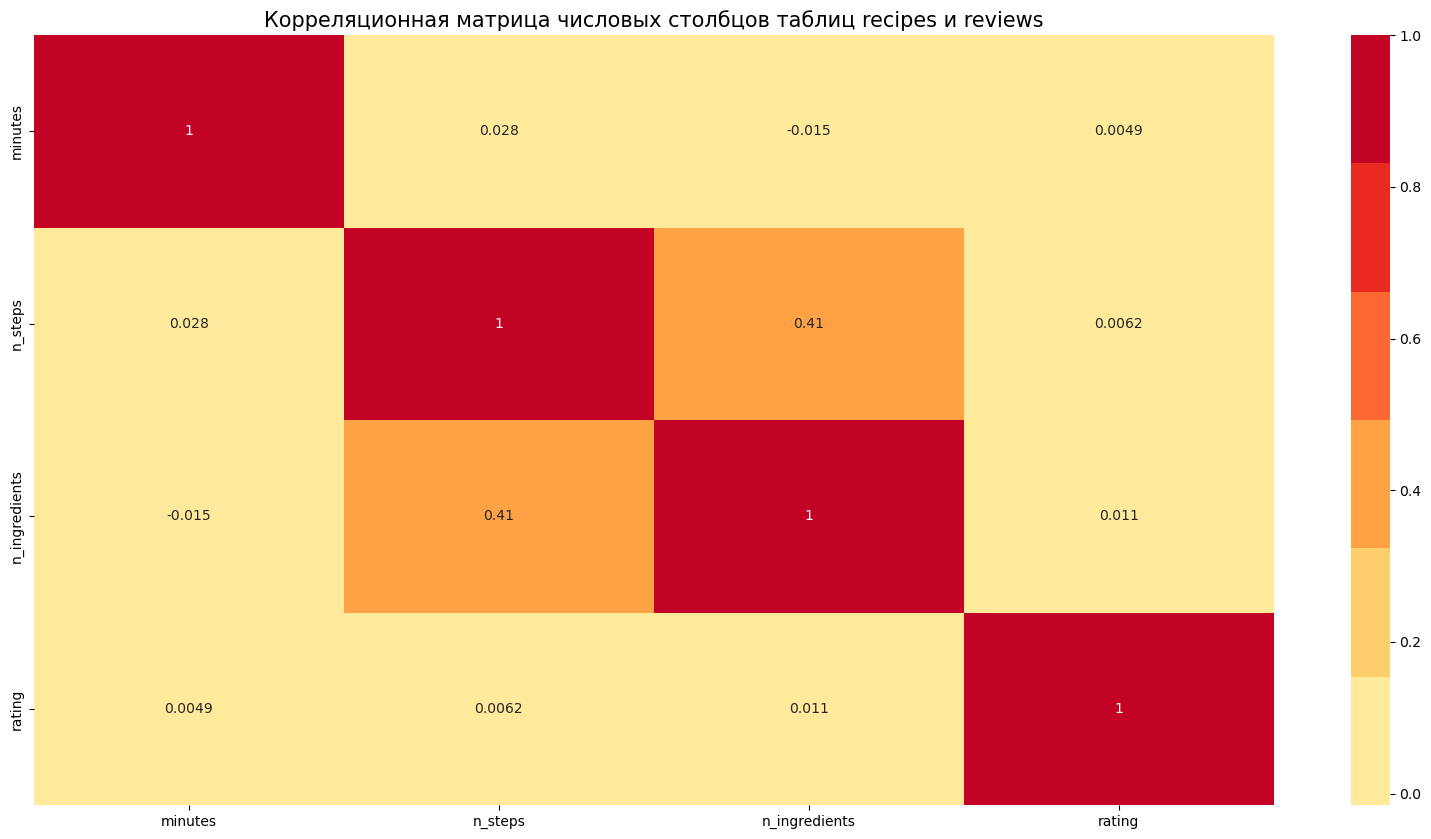

In [261]:
plt.figure(figsize=(20, 10))

columns = ["minutes", "n_steps", "n_ingredients", "rating"]

sns.heatmap(bank[["minutes", "n_steps", "n_ingredients", "rating"]].corr().values, 
            ax=plt.axes(), 
            xticklabels=columns, 
            yticklabels=columns, 
            annot=True,
            cmap=sns.color_palette('YlOrRd')
           )

plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews', fontsize=15)
